In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('C:\\Users\\MirekR\\Documents\\Python\\kodilla\\tmdb_movies.csv')
filmy = pd.DataFrame(data)
data = pd.read_csv('C:\\Users\\MirekR\\Documents\\Python\\kodilla\\tmdb_genres.csv')
gatunki = pd.DataFrame(data)
data = pd.read_csv('C:\\Users\\MirekR\\Documents\\Python\\kodilla\\tmdb_genres.csv')
gatunki = pd.DataFrame(data)
gatunki.rename(columns={ 'Unnamed: 0':'genre_id'},inplace=True)

In [2]:
#Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.
temp=pd.DataFrame(filmy[filmy['vote_count'] > filmy['vote_count'].median()])
mediana2=temp['vote_count'].median()
temp=pd.DataFrame(filmy[filmy['vote_count'] > mediana2])
temp.sort_values(by='vote_average',ascending=False)[:10]

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


Text(0.5, 1.0, 'Średni przychów i budżet filmu w latach 2010-2016')

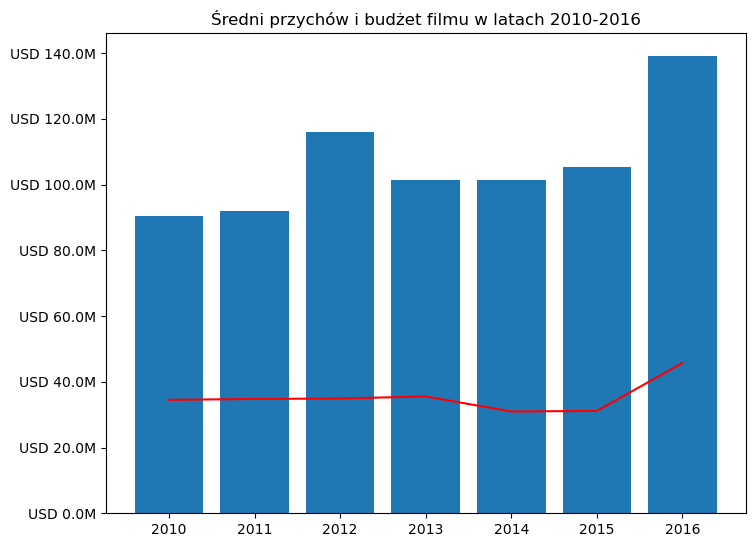

In [3]:
#Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres
filmy['release_date'] = pd.to_datetime(filmy['release_date'])
temp=pd.DataFrame(filmy[(filmy['release_date']>='2010-1-1')&(filmy['release_date']<= '2016-12-31')])
#temp2=temp.groupby(pd.Grouper(key='release_date',freq='Y')).agg({'budget':'mean','revenue':'mean'})
temp2=temp.groupby(temp['release_date'].dt.year).agg({'budget': 'mean', 'revenue': 'mean'})
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]) # left, bottom, width, height
def million(x, pos):
        return 'USD {:2.1f}M'.format(x*1e-6)
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)
axes.bar(temp2.index,temp2['revenue'],label='revenues')
axes.plot(temp2.index,temp2['budget'],color='red',label='budget')
axes.set_title('Średni przychów i budżet filmu w latach 2010-2016')

In [4]:
#Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.
filmy=pd.merge(filmy,gatunki,how='inner',on='genre_id')
filmy

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
2,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
3,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action
4,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4714,0,NaN,282128,en,An American in Hollywood,A talented young filmmaker from New York sets ...,0.015697,2014-07-18,0,89.0,Released,NaN,An American in Hollywood,0.0,0,NaN,NaN
4799,4716,0,NaN,38786,en,The Blood of My Brother: A Story of Death in Iraq,THE BLOOD OF MY BROTHER goes behind the scenes...,0.005256,2005-11-25,0,90.0,Released,NaN,The Blood of My Brother: A Story of Death in Iraq,0.0,0,NaN,NaN
4800,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN
4801,4666,225000,http://detroitfirefilm.org/,139948,en,Burn,"A character-driven, action-packed documentary ...",0.126676,2012-11-01,111300,86.0,Released,One Year on the Front Lines of the Battle to S...,Burn,6.9,6,10769.0,Foreign


In [5]:
#Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?
print('Najczęścej pojawiają się filmy z gatunku:',filmy['genres'].value_counts().index[0])
print('W bazie znajduje się',filmy['genres'].value_counts()[0],'filmów tego gatunku')

Najczęścej pojawiają się filmy z gatunku: Drama
W bazie znajduje się 1207 filmów tego gatunku


In [6]:
#Filmy, którego gatunku trwają średnio najdłużej (runtime)?
długość=filmy.groupby(['genres','runtime']).mean().index[-1]
print('Najdłużej trwają filmy z gatunku:',długość[0])


Najdłużej trwają filmy z gatunku: Western


C:\Users\MirekR\AppData\Local\Temp\ipykernel_4732\1973988279.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  długość=filmy.groupby(['genres','runtime']).mean().index[-1]


C:\Users\MirekR\AppData\Local\Temp\ipykernel_4732\3757446231.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  długość_hist=pd.DataFrame(filmy[filmy['genres'] == filmy.groupby(['genres','runtime']).mean().index[-1][0]])


<Axes: ylabel='Frequency'>

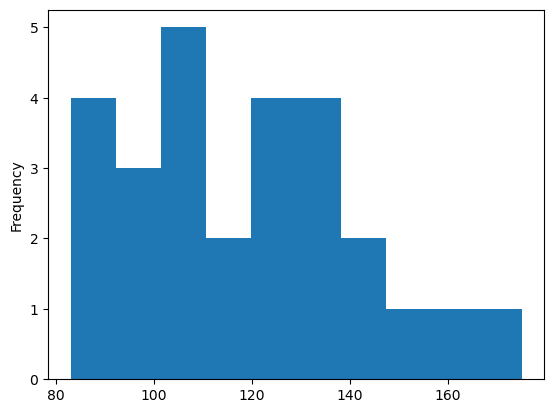

In [7]:
#Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.
długość_hist=pd.DataFrame(filmy[filmy['genres'] == filmy.groupby(['genres','runtime']).mean().index[-1][0]])
długość_hist['runtime'].plot(kind='hist',bins=10)